In [1]:
import torch
from torchviz import make_dot
import torch.nn as nn

In [2]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.conv1 = nn.Conv1d(18, 64, 9)
        self.conv2 = nn.Conv1d(64, 32, 5)
        self.conv3 = nn.Conv1d(32, 32, 5)
        self.conv4 = nn.Conv1d(32, 16, 5)
        self.relu = nn.LeakyReLU()
        self.maxpool = nn.MaxPool1d(2, 2, padding=1)
        self.fc1 = nn.Linear(256, 256)  # why 256? 
        self.fc2 = nn.Linear(256, 108)  # 新增一个全连接层
        self.dropout = nn.Dropout(0.5)  # Dropout 层，概率为0.5
        self.fc3 = nn.Linear(108, 4)  # 这是原来的第二个全连接层，现在变成第三个

    def forward(self, x):
        x = x.permute(0,2,1)
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = self.relu(self.conv3(x))
        x = self.maxpool(x)
        x = self.relu(self.conv4(x))
        x = self.maxpool(x)
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

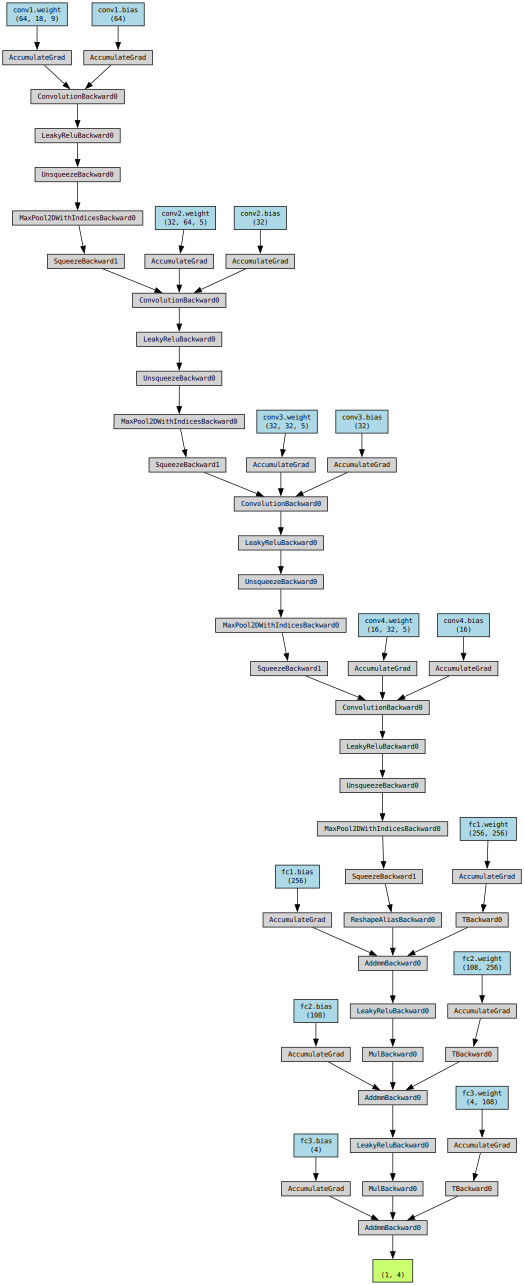

In [3]:
model = MyNet()
x = torch.randn(1, 301, 18)
y = model(x)

make_dot(y, params=dict(model.named_parameters()))

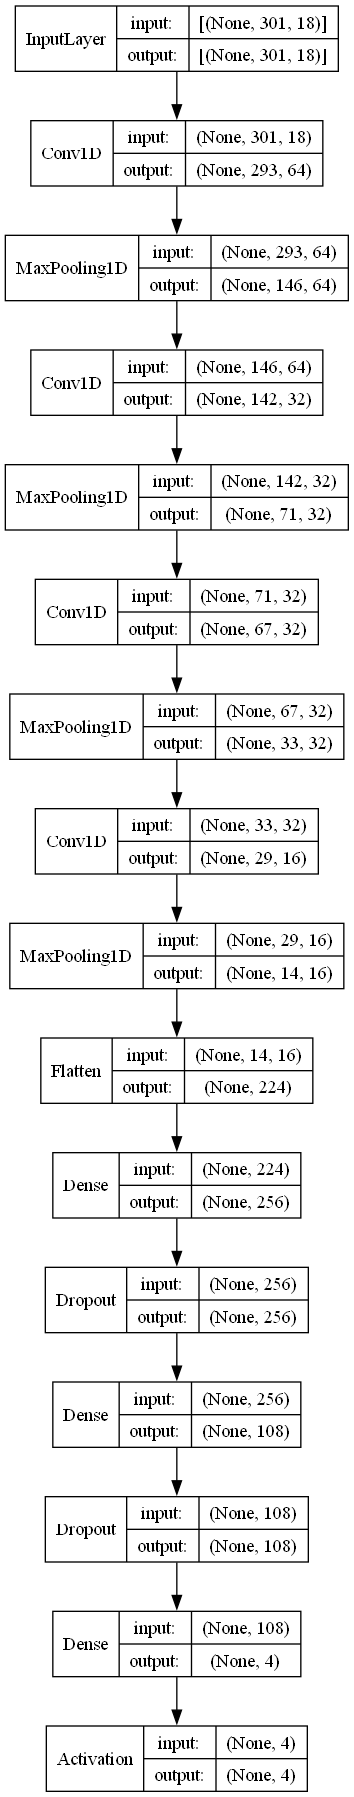

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
if tf.__version__.split('.')[0]=='2':
    from tensorflow import keras
else:
    import keras

# モデルをつくります
inputs = keras.layers.Input(shape=(301, 18))
x = keras.layers.Conv1D(64, 9, activation='relu')(inputs)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.Conv1D(32, 5, activation='relu')(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.Conv1D(32, 5, activation='relu')(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.Conv1D(16, 5, activation='relu')(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(108, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(4)(x)

predictions = keras.layers.Activation('softmax')(x)
model = keras.Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# モデルを可視化します
keras.utils.plot_model(model, show_shapes=True, expand_nested=True,show_layer_names=False)
